  # DSC 530 Data Exploration and Analysis

Assignment Week 10

Author: Gyan Kannur

# The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of RunLinearModel that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [12]:
# import few libraries 
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [13]:
# Load the data
# The pandas library used to read a CSV file and create a DataFrame.
# The 'date' column should be parsed as dates instead of treating them as strings.
prices = pd.read_csv('mj-clean.csv', parse_dates=['date'])
# set_index is a method of the DataFrame class in pandas that sets the specified column as the index of the DataFrame.
# The 'date' is the column name to be set as the index.
# inplace=True specifies to modify the DataFrame in place without creating a new object.
prices.set_index('date', inplace=True)
# ['price'] selects the column named 'price' from the DataFrame, creating a new DataFrame.
prices = prices['price']

In [14]:
prices.head()

date
2010-09-02    100
2010-09-02     60
2010-09-02     60
2010-09-02    400
2010-09-02     55
Name: price, dtype: int64

In [15]:
# Add a quadratic time variable
# Adding two new columns, 'time' and 'time2', to the existing prices DataFrame. 
# The 'time' column represents the number of days between each date in the index and the first date, 
# while the 'time2' column represents the square of the number of days. 
# This information allows for the inclusion of quadratic terms when fitting a quadratic model to the data
prices = pd.concat([prices, prices.index.to_series().apply(lambda x: (x - prices.index[0]).days).rename('time'), 
                   prices.index.to_series().apply(lambda x: ((x - prices.index[0]).days) ** 2).rename('time2')], axis=1)

In [16]:
prices.head()

,price,time,time2
date,,,
2010-09-02,100,0,0
2010-09-02,60,0,0
2010-09-02,60,0,0
2010-09-02,400,0,0
2010-09-02,55,0,0


In [17]:
# Check the columns in the prices DataFrame
# It helps verify the column names and ensure they match the expectations.
print(prices.columns)

# Select the appropriate column as the response variable
# resp is assigned the column named 'price' from the prices DataFrame. 
# This column is chosen as the response variable or the dependent variable in the regression model. 
resp = prices['price']  # Replace 'prices' with the correct column name

# Fit a quadratic model
# The formula 'resp ~ time + time2' specifies the regression equation, 
# where 'resp' represents the response variable, 'time' and 'time2' are the predictors (columns created previously), 
# and data=prices indicates that the data for the regression model is available in the prices DataFrame.
model = smf.ols('resp ~ time + time2', data=prices).fit()

# Generate predictions using the model
# The predict() method of the fitted model is used to generate predictions based on the regression model. 
# The prices DataFrame is passed as the argument to the predict() function to predict the response variable. 
# The resulting predictions are stored in the predictions variable and then printed.
predictions = model.predict(prices)
print(predictions)

Index(['price', 'time', 'time2'], dtype='object')
date
2010-09-02    135.344543
2010-09-02    135.344543
2010-09-02    135.344543
2010-09-02    135.344543
2010-09-02    135.344543
                 ...    
2014-05-13    136.654595
2014-05-13    136.654595
2014-05-13    136.654595
2014-05-13    136.654595
2014-05-13    136.654595
Length: 147070, dtype: float64


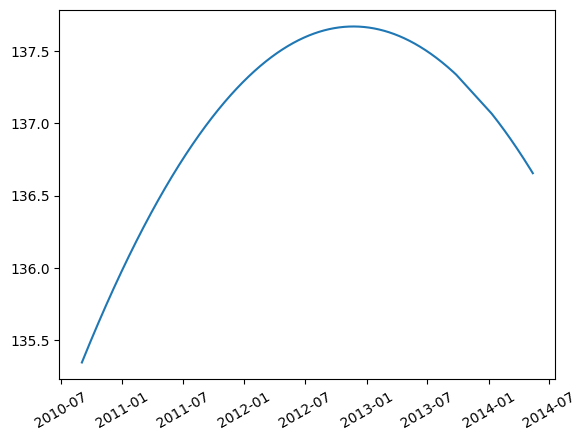

In [18]:
# Plot the predictions
import matplotlib.pyplot as plt
# plt.plot(prices)
plt.plot(predictions)
plt.xticks(rotation=30)
plt.show()

In [19]:
# as time goes by, prices hit peak around second half of 2012 and then began to drop afterward.

In [20]:
# Exercise 12-2

# Write a definition for a class named SerialCorrelationTest that extends HypothesisTest from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [21]:
# import few libraries
import numpy as np
from scipy.stats import pearsonr
import numpy as np
import thinkstats2
import thinkplot
import nsfg


# declares the SerialCorrelationTest class and specifies that it inherits from the HypothesisTest class 
# defined in the ThinkStats2 library.
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    # Initialize function (constructor) of the SerialCorrelationTest class. 
    # It takes two arguments: series and lag. 
    # The series argument represents the data series to be tested for serial correlation, 
    # and the lag argument represents the time lag used for computing the correlation.
    def __init__(self, series, lag):
        self.series = series
        self.lag = lag
        self.actual_corr = None
    
    # A function named test_statistic within the SerialCorrelationTest class. 
    # It calculates the test statistic, which is the correlation coefficient between the series 
    # and the same series shifted by the specified lag. 
    # It uses the pearsonr function from the scipy.stats module to calculate the correlation coefficient. 
    # The computed correlation coefficient is stored in self.actual_corr.
    def test_statistic(self):
        self.actual_corr, _ = pearsonr(self.series[:-self.lag], self.series[self.lag:])
        return self.actual_corr
    
    # A function named p_value within the SerialCorrelationTest class. 
    # It calculates the p-value of the observed correlation coefficient. 
    # The method performs a permutation test by generating a distribution of test statistics (correlation coefficients) 
    # by resampling the data. The number of iterations is specified by the iters parameter, which defaults to 1000.
    def p_value(self, iters=1000):
        self.test_statistics = [self.test_statistic() for _ in range(iters)]
        count = sum(1 for test_statistic in self.test_statistics if test_statistic >= self.actual_corr)
        return count / iters


In [22]:
# fit a linear model to the data
# assigns the column named 'price' from the prices DataFrame to the resp variable. 
# It represents the response variable or the dependent variable for the linear model. 
resp = prices['price']  # Replace 'prices' with the correct column name
# creates a linear model using ordinary least squares (OLS) regression. 
# The formula 'resp ~ time' specifies the regression equation, 
# where 'resp' represents the response variable and 'time' represents the predictor (column created previously). 
# data=prices indicates that the data for the regression model is available in the prices DataFrame.
model = smf.ols('resp ~ time', data=prices)
# fits the linear model using the fit() method of the model object. 
# It performs the regression analysis and estimates the coefficients and other model statistics.
results = model.fit()
results

# extract the residuals
# extracts the residuals from the linear regression model. 
# The residuals represent the differences between the observed values and the predicted values from the linear model.
residuals = results.resid
# print out
print(residuals)

# create a SerialCorrelationTest object and run the test
# sets the lag value to 1, which represents the time lag used for computing the serial correlation.
lag = 1
# creates an instance of the SerialCorrelationTest class, passing the residuals and lag as arguments.
test = SerialCorrelationTest(residuals, lag)
# runs the serial correlation test on the residuals by calling the p_value() method of the SerialCorrelationTest object. 
# It computes the p-value of the observed serial correlation.
pvalue = test.p_value()

# # print the results
print('Residuals of Linear Model')
print(f'Lag: {lag}')
print(f'Autocorrelation: {test.actual_corr:.3f}')
print(f'p-value: {pvalue:.3f}')

date
2010-09-02    -36.456703
2010-09-02    -76.456703
2010-09-02    -76.456703
2010-09-02    263.543297
2010-09-02    -81.456703
                 ...    
2014-05-13      2.155467
2014-05-13   -107.844533
2014-05-13    -37.844533
2014-05-13   -102.844533
2014-05-13   -117.844533
Length: 147070, dtype: float64
Residuals of Linear Model
Lag: 1
Autocorrelation: 0.010
p-value: 1.000


# Conclusion

the autocorrelation of 0.010 suggests a weak positive linear relationship between adjacent residuals.
the p-value of 1.000 indicates that the observed autocorrelation is not statistically significant.